Зотов Роман Алексеевич 6132
<br>Тема лабораторной работы: градиентный бустинг

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from itertools import combinations
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor


# Задание 1

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [12]:
heros = pd.read_csv(f'../lab4/Constants.Heroes.csv')
heros

,Unnamed: 0,id,name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,localized_name
0,0,1,npc_dota_hero_antimage,agi,Melee,"['Carry', 'Escape', 'Nuker']",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,1.00,...,1.4,100,0.30,310,NaN,True,2,1800,800,Anti-Mage
1,1,2,npc_dota_hero_axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Carry']",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,2.50,...,1.7,100,0.40,315,NaN,True,2,1800,800,Axe
2,2,3,npc_dota_hero_bane,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,0.25,...,1.7,100,0.30,305,NaN,True,4,1800,1200,Bane
3,3,4,npc_dota_hero_bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Nuker', 'Initiator']",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,0.25,...,1.7,100,0.43,285,NaN,True,2,1800,800,Bloodseeker
4,4,5,npc_dota_hero_crystal_maiden,int,Ranged,"['Support', 'Disabler', 'Nuker']",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,0.25,...,1.7,100,0.45,280,NaN,True,2,1800,800,Crystal Maiden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,135,npc_dota_hero_dawnbreaker,str,Melee,"['Carry', 'Durable']",/apps/dota2/images/dota_react/heroes/dawnbreak...,/apps/dota2/images/dota_react/heroes/icons/daw...,120,0.50,...,1.7,100,0.46,300,0.6,True,2,1800,800,Dawnbreaker
122,122,136,npc_dota_hero_marci,all,Melee,"['Support', 'Carry', 'Initiator', 'Disabler', ...",/apps/dota2/images/dota_react/heroes/marci.png?,/apps/dota2/images/dota_react/heroes/icons/mar...,120,0.25,...,1.7,100,0.30,315,0.9,True,2,1800,800,Marci
123,123,137,npc_dota_hero_primal_beast,str,Melee,"['Initiator', 'Durable', 'Disabler']",/apps/dota2/images/dota_react/heroes/primal_be...,/apps/dota2/images/dota_react/heroes/icons/pri...,120,0.25,...,1.8,100,0.60,305,0.6,True,2,1800,800,Primal Beast
124,124,138,npc_dota_hero_muerta,int,Ranged,"['Carry', 'Nuker', 'Disabler']",/apps/dota2/images/dota_react/heroes/muerta.png?,/apps/dota2/images/dota_react/heroes/icons/mue...,120,0.25,...,1.7,115,0.35,295,0.7,True,2,1800,800,Muerta


In [13]:
df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
df

C:\Users\Roma\AppData\Local\Temp\ipykernel_6968\3887877372.py:1: DtypeWarning: Columns (148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))
C:\Users\Roma\AppData\Local\Temp\ipykernel_6968\3887877372.py:1: DtypeWarning: Columns (51,52,128,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(pd.read_csv(f'../lab2/20250{i}/players.csv') for i in range(1,5))


,player_slot,obs_placed,sen_placed,creeps_stacked,camps_stacked,rune_pickups,firstblood_claimed,teamfight_participation,towers_killed,roshans_killed,...,purchase_rapier,match_id,leagueid,performance_others,additional_units,repicked,hero_variant,neutral_tokens_log,neutral_item_history,item_neutral2
0,0,0.0,0.0,4.0,2.0,1.0,0.0,0.863636,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 433, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
1,1,2.0,0.0,3.0,1.0,5.0,0.0,0.636364,3.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 1918, 'key': 'Tier3Token'}]",NaN,NaN
2,2,0.0,0.0,6.0,2.0,7.0,0.0,0.227273,2.0,1.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,"[{'time': 473, 'key': 'Tier1Token'}, {'time': ...",NaN,NaN
3,3,9.0,12.0,66.0,12.0,1.0,0.0,0.227273,0.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
4,4,4.0,5.0,43.0,7.0,3.0,0.0,0.818182,1.0,0.0,...,NaN,8107483721,17163,NaN,NaN,NaN,1.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,128,3.0,2.0,8.0,3.0,0.0,0.0,0.400000,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,3.0,[],"[{'time': 488, 'item_neutral': 'mana_draught',...",1586.0
6416,129,0.0,0.0,0.0,0.0,3.0,0.0,0.266667,0.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 450, 'item_neutral': 'polliwog_charm...",1577.0
6417,130,1.0,1.0,3.0,1.0,2.0,0.0,0.333333,1.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,2.0,[],"[{'time': 458, 'item_neutral': 'spark_of_coura...",1594.0
6418,131,2.0,0.0,0.0,0.0,11.0,0.0,0.866667,2.0,0.0,...,NaN,8245079060,17211,NaN,NaN,NaN,1.0,[],"[{'time': 461, 'item_neutral': 'trusty_shovel'...",1583.0


# Задание 2

Привести описание датасета - используем преобразованный датасет из 2 лабораторной, как и в 3-5 лабораторных работах
<br> Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".
<br> Нормализовать численные данные.
<br> Разбить выборку на обучающую и тестовую

In [14]:
def extract_teams(group):
    radiant = group[group['player_slot'] < 64].sort_values('player_slot')['hero_id'].tolist()
    dire    = group[group['player_slot'] >= 64].sort_values('player_slot')['hero_id'].tolist()
    return pd.Series({
        'radiant_heroes': radiant,
        'dire_heroes': dire,
        'radiant_win': group['radiant_win'].iloc[0]
    })

def synergy(line):
    wr_radiant, wr_dire = 0.0, 0.0
    
    # Для Radiant
    for hero1, hero2 in combinations(sorted(line['radiant_heroes']), 2):
        # Исправлено: безопасное получение винрейта (если пара отсутствует, используется 0.5)
        pair_data = winrate_df[(winrate_df['hero1'] == hero1) & (winrate_df['hero2'] == hero2)]
        wr = pair_data['winrate'].values[0] if not pair_data.empty else 0.5
        wr_radiant += wr
    
    # Для Dire
    for hero1, hero2 in combinations(sorted(line['dire_heroes']), 2):
        pair_data = winrate_df[(winrate_df['hero1'] == hero1) & (winrate_df['hero2'] == hero2)]
        wr = pair_data['winrate'].values[0] if not pair_data.empty else 0.5
        wr_dire += wr
    
    return pd.Series({'wr_radiant': wr_radiant, 'wr_dire': wr_dire})


def hero_melee(line):
    melee_radiant, melee_dire = 0, 0
    agi_radiant, int_radiant, str_radiant =0,0,0
    agi_dire, int_dire, str_dire =0,0,0
    for hero in line['radiant_heroes']:
        hero_data = heros[heros['id'] == hero].iloc[0]
        melee_radiant += 1 if hero_data['attack_type'] == 'Melee' else 0
        agi_radiant += 1 if hero_data['primary_attr'] == 'agi' else 0
        int_radiant += 1 if hero_data['primary_attr'] == 'int' else 0
        str_radiant += 1 if hero_data['primary_attr'] == 'str' else 0

    for hero in line['dire_heroes']:
        hero_data = heros[heros['id'] == hero].iloc[0]

        melee_dire += 1 if hero_data['attack_type'] == 'Melee' else 0
        agi_dire += 1 if hero_data['primary_attr'] == 'agi' else 0
        int_dire += 1 if hero_data['primary_attr'] == 'int' else 0
        str_dire += 1 if hero_data['primary_attr'] == 'str' else 0

    return pd.Series({'melee_radiant': melee_radiant, 
                      'agi_radiant': agi_radiant,
                      'int_radiant': int_radiant, 
                      'str_radiant': str_radiant,
                      'melee_dire': melee_dire, 
                      'agi_dire': agi_dire,
                      'int_dire': int_dire, 
                      'str_dire': str_dire,})

In [15]:
df = df[['match_id', 'hero_id', 'player_slot', 'radiant_win']]
data = df.copy()
data['team'] = data['player_slot'].apply(lambda x: 'radiant' if x < 128 else 'dire')
grouped = data.groupby(['match_id', 'team'])['hero_id'].apply(list).reset_index()
results = []
for _, row in grouped.iterrows():
    match_id = row['match_id']
    team = row['team']
    heroes = row['hero_id']
    # Получаем результат матча для команды
    radiant_win = df.loc[df['match_id'] == match_id, 'radiant_win'].values[0]
    win = 1 if (team == 'radiant' and radiant_win) or (team == 'dire' and not radiant_win) else 0
    
    # Генерируем уникальные пары героев (с сортировкой)
    for hero1, hero2 in combinations(sorted(heroes), 2):
        results.append((hero1, hero2, win, 1))

results_df = pd.DataFrame(results, columns=['hero1', 'hero2', 'win', 'total'])
winrate_df = results_df.groupby(['hero1', 'hero2']).agg(
    total_matches=('total', 'sum'),
    wins=('win', 'sum')
).reset_index()

winrate_df['winrate'] = winrate_df['wins'] / winrate_df['total_matches']

# Сортируем по убыванию винрейта
winrate_df = winrate_df.sort_values(by='winrate', ascending=False)
matches = df.groupby('match_id').apply(extract_teams).reset_index(drop=True)
matches[['wr_radiant', 'wr_dire']] = matches.apply(synergy, axis=1)
matches[['melee_radiant', 
         'wr_agi_radiantdire',
         'int_radiant',
         'str_radiant',
         'melee_dire',
         'agi_dire',
         'int_dire',
         'str_dire']] = matches.apply(hero_melee, axis=1)


matches

C:\Users\Roma\AppData\Local\Temp\ipykernel_6968\3036435291.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches = df.groupby('match_id').apply(extract_teams).reset_index(drop=True)


,radiant_heroes,dire_heroes,radiant_win,wr_radiant,wr_dire,melee_radiant,wr_agi_radiantdire,int_radiant,str_radiant,melee_dire,agi_dire,int_dire,str_dire
0,"[2, 11, 95, 37, 101]","[102, 36, 46, 22, 26]",False,4.551676,4.762175,1,2,2,1,1,1,3,0
1,"[11, 57, 86, 70, 97]","[41, 74, 101, 2, 79]",False,4.609899,5.923563,3,2,1,1,2,1,2,1
2,"[20, 25, 40, 38, 6]","[56, 58, 55, 13, 100]",False,4.661503,6.164294,1,1,1,0,2,1,2,1
3,"[110, 135, 86, 102, 95]","[99, 103, 49, 76, 79]",True,4.974494,4.382621,2,1,1,1,3,0,2,3
4,"[126, 6, 40, 136, 135]","[67, 38, 106, 138, 110]",False,4.342666,4.981311,3,1,0,1,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,"[97, 2, 21, 87, 88]","[35, 70, 20, 105, 64]",False,4.345126,5.336959,3,0,1,1,1,2,1,0
8342,"[35, 20, 70, 123, 64]","[97, 81, 53, 110, 2]",True,5.473412,3.830756,1,3,1,0,3,0,1,2
8343,"[137, 97, 22, 128, 106]","[16, 71, 136, 19, 30]",True,4.668864,3.957803,3,1,1,1,4,0,1,2
8344,"[77, 79, 44, 25, 26]","[129, 46, 17, 105, 75]",True,4.790199,4.858105,2,1,3,0,1,1,2,1


In [16]:
categorical_features = ['radiant_hero_1', 'radiant_hero_2', 'radiant_hero_3', 'radiant_hero_4',
                        'radiant_hero_5', 'dire_hero_1', 'dire_hero_2', 'dire_hero_3',
                        'dire_hero_4', 'dire_hero_5']

numeric_features = ['wr_radiant', 'wr_dire',
                    'melee_radiant', 'wr_agi_radiantdire', 'int_radiant', 'str_radiant',
                    'melee_dire', 'agi_dire', 'int_dire', 'str_dire']

target = 'radiant_win'

heroes_rad = pd.DataFrame(matches['radiant_heroes'].tolist(),
                          columns=[f'radiant_hero_{i+1}' for i in range(5)],
                          index=matches.index)
heroes_dire = pd.DataFrame(matches['dire_heroes'].tolist(),
                          columns=[f'dire_hero_{i+1}' for i in range(5)],
                          index=matches.index)

matches_raw = pd.concat([heroes_rad, heroes_dire, matches.drop(['radiant_heroes', 'dire_heroes'], axis=1)], axis=1)

X_raw = matches_raw[categorical_features + numeric_features]
y_raw = matches_raw[target]

scaler = StandardScaler()
X_raw[numeric_features] = scaler.fit_transform(X_raw[numeric_features])


X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, 
    y_raw, 
    test_size=0.2, 
    random_state=42
)


C:\Users\Roma\AppData\Local\Temp\ipykernel_6968\1589436771.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[numeric_features] = scaler.fit_transform(X_raw[numeric_features])


In [17]:
all_heroes = sorted(
    set(matches['radiant_heroes'].explode().unique()) | 
    set(matches['dire_heroes'].explode().unique())
)

# Инициализируем бинаризатор
mlb = MultiLabelBinarizer(classes=all_heroes)

# Преобразуем списки героев в бинарные матрицы
X_radiant = mlb.fit_transform(matches['radiant_heroes'])
X_dire = mlb.transform(matches['dire_heroes'])

# Создаем DataFrame с признаками героев
hero_columns = [f"hero_{h}" for h in all_heroes]
df_radiant = pd.DataFrame(X_radiant, columns=[f"radiant_{c}" for c in hero_columns])
df_dire = pd.DataFrame(X_dire, columns=[f"dire_{c}" for c in hero_columns])


wr_scaled = scaler.transform(matches[['wr_radiant', 'wr_dire','melee_radiant', 'wr_agi_radiantdire','int_radiant','str_radiant','melee_dire','agi_dire','int_dire','str_dire']])

# Создаем DataFrame для масштабированных признаков
df_wr = pd.DataFrame(wr_scaled, columns=['wr_radiant_scaled', 'wr_dire_scaled',
                                         'melee_radiant_scaled', 'wr_agi_radiantdire_scaled',
                                         'int_radiant_scaled','str_radiant_scaled','melee_dire_scaled',
                                         'agi_dire_scaled','int_dire_scaled','str_dire_scaled'])

numeric_features = ['wr_radiant_scaled', 'wr_dire_scaled',
                                         'melee_radiant_scaled', 'wr_agi_radiantdire_scaled',
                                         'int_radiant_scaled','str_radiant_scaled','melee_dire_scaled',
                                         'agi_dire_scaled','int_dire_scaled','str_dire_scaled']
# Объединяем все признаки
matches_encoded = pd.concat([df_radiant, df_dire, df_wr, matches['radiant_win']], axis=1)
matches_encoded = matches_encoded.rename(columns={'radiant_win':'target'})
matches_encoded

,radiant_hero_1,radiant_hero_2,radiant_hero_3,radiant_hero_4,radiant_hero_5,radiant_hero_6,radiant_hero_7,radiant_hero_8,radiant_hero_9,radiant_hero_10,...,wr_dire_scaled,melee_radiant_scaled,wr_agi_radiantdire_scaled,int_radiant_scaled,str_radiant_scaled,melee_dire_scaled,agi_dire_scaled,int_dire_scaled,str_dire_scaled,target
0,0,1,0,0,0,0,0,0,0,0,...,-0.466277,-1.835789,1.223114,0.716334,-0.469348,-1.800581,-0.086731,1.898173,-1.632466,False
1,0,0,0,0,0,0,0,0,0,0,...,1.920418,0.519915,1.223114,-0.473659,-0.469348,-0.639338,-0.086731,0.712561,-0.478527,False
2,0,0,0,0,0,1,0,0,0,0,...,2.415129,-1.835789,-0.124135,-0.473659,-1.636913,-0.639338,-0.086731,0.712561,-0.478527,False
3,0,0,0,0,0,0,0,0,0,0,...,-1.246274,-0.657937,-0.124135,-0.473659,-0.469348,0.521906,-1.449923,0.712561,1.829352,True
4,0,0,0,0,0,1,0,0,0,0,...,-0.015944,0.519915,-0.124135,-1.663651,-0.469348,0.521906,1.276462,-0.473052,-1.632466,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,0,1,0,0,0,0,0,0,0,0,...,0.714924,0.519915,-1.471385,-0.473659,-0.469348,-1.800581,1.276462,-0.473052,-1.632466,False
8342,0,0,0,0,0,0,0,0,0,0,...,-2.380378,-1.835789,2.570363,-0.473659,-1.636913,0.521906,-1.449923,-0.473052,0.675413,True
8343,0,0,0,0,0,0,0,0,0,0,...,-2.119291,0.519915,-0.124135,-0.473659,-0.469348,1.683149,-1.449923,-0.473052,0.675413,True
8344,0,0,0,0,0,0,0,0,0,0,...,-0.269138,-0.657937,-0.124135,1.906326,-1.636913,-1.800581,-0.086731,0.712561,-0.478527,True


In [20]:
X_encoded = matches_encoded.drop('target', axis=1)
y_encoded = matches_encoded['target']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Задание 3

In [24]:
# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded
# X_train_raw, X_test_raw, y_train_raw, y_test_raw

С использованием GridSearchCV/grid_search осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.

In [28]:
param_grids = {
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'reg_alpha': [0, 0.1],  # L1
        'reg_lambda': [0, 1.0]  # L2
    },
    'CatBoost': {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3]
    }
}


models = {
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME',random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, early_stopping_rounds=10, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42,  verbose=0, train_dir='catboost_info')
}

best_params = {}
best_models = {}

for name, model in models.items():
    print(f"Подбор гиперпараметров для {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1_weighted',
        n_jobs=1  # Устанавливаем n_jobs=1 для CatBoost
    )
    if name == 'XGBoost':
        grid_search.fit(X_train_encoded, y_train_encoded, eval_set=[(X_test_encoded, y_test_encoded)], verbose=False)
    elif name == 'CatBoost':
        grid_search.fit(X_train_encoded, y_train_encoded, early_stopping_rounds=10, eval_set=(X_test_encoded, y_test_encoded), verbose=False)
    else:
        grid_search.fit(X_train_encoded, y_train_encoded)
    
    best_params[name] = grid_search.best_params_
    best_models[name] = grid_search.best_estimator_
    print(f"Лучшие параметры для {name}: {grid_search.best_params_}")

Подбор гиперпараметров для AdaBoost...
Лучшие параметры для AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Подбор гиперпараметров для GradientBoosting...
Лучшие параметры для GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Подбор гиперпараметров для XGBoost...
Лучшие параметры для XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.0}
Подбор гиперпараметров для CatBoost...
Лучшие параметры для CatBoost: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [30]:
#Обучить модели XGBoost и CatBoost с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
xgb_raw = XGBClassifier(**best_params['XGBoost'], random_state=42)
xgb_raw.fit(X_train_raw, y_train_raw)  # XGBoost не поддерживает cat_features напрямую

catboost_raw = CatBoostClassifier(**best_params['CatBoost'], random_state=42, verbose=0, train_dir='catboost_info')
catboost_raw.fit(X_train_raw, y_train_raw, early_stopping_rounds=10, eval_set=(X_test_raw, y_test_raw), verbose=False)

In [ ]:
for name, model in best_models.items():
    print(f"\nМетрики для {name}:")
    y_pred = model.predict(X_test_encoded)
    print(classification_report(y_test_encoded, y_pred))


Метрики для AdaBoost:
              precision    recall  f1-score   support

       False       0.76      0.77      0.76       800
        True       0.78      0.78      0.78       870

    accuracy                           0.77      1670
   macro avg       0.77      0.77      0.77      1670
weighted avg       0.77      0.77      0.77      1670


Метрики для GradientBoosting:
              precision    recall  f1-score   support

       False       0.78      0.76      0.77       800
        True       0.78      0.80      0.79       870

    accuracy                           0.78      1670
   macro avg       0.78      0.78      0.78      1670
weighted avg       0.78      0.78      0.78      1670


Метрики для XGBoost:
              precision    recall  f1-score   support

       False       0.79      0.76      0.77       800
        True       0.78      0.81      0.80       870

    accuracy                           0.79      1670
   macro avg       0.79      0.78      0.78      167

In [37]:
best_models_raw = {'XGBoost_Raw': xgb_raw, 'CatBoost_Raw': catboost_raw}
for name, model in best_models_raw.items():
    print(f"\nМетрики для {name}:")
    y_pred = model.predict(X_test_raw)
    print(classification_report(y_test_raw, y_pred))


Метрики для XGBoost_Raw:
              precision    recall  f1-score   support

       False       0.78      0.77      0.77       801
        True       0.79      0.80      0.80       869

    accuracy                           0.79      1670
   macro avg       0.78      0.78      0.78      1670
weighted avg       0.78      0.79      0.78      1670


Метрики для CatBoost_Raw:
              precision    recall  f1-score   support

       False       0.80      0.77      0.79       801
        True       0.80      0.82      0.81       869

    accuracy                           0.80      1670
   macro avg       0.80      0.80      0.80      1670
weighted avg       0.80      0.80      0.80      1670



Основываясь на выводе метрик, можем увидеть, что CatBoost_Raw показывает лучшую точность

# Задание 4

С использованием shap.TreeExplainer получить SHAP-значения для лучшей модели.
<br>Построить график shap.plots.force для одного объекта выборки и для среза произвольного размера.
<br>Построить график shap.plots.bar для одного объекта выборки.
<br>Построить график shap.plots.waterfall для одного объекта выборки.
<br>Построить 2 графика shap.plots.scatter для какого-нибудь признака. На одном раскрасить относительно себя, на втором – относительно другого признака.
<br>Построить график shap.plots.beeswarm для всех признаков.
<br>Построить график shap.plots.bar для всех признаков.
<br>На основании двух последних графиков и/или используя feature_importance отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
<br>Сравнить метрики до и после фильтрации.
<br>Визуализировать полученное дерево решений.


In [39]:
best_model_name = 'CatBoost_Raw'
best_model = best_models_raw[best_model_name]

explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test_raw)

<Figure size 1000x8000 with 0 Axes>

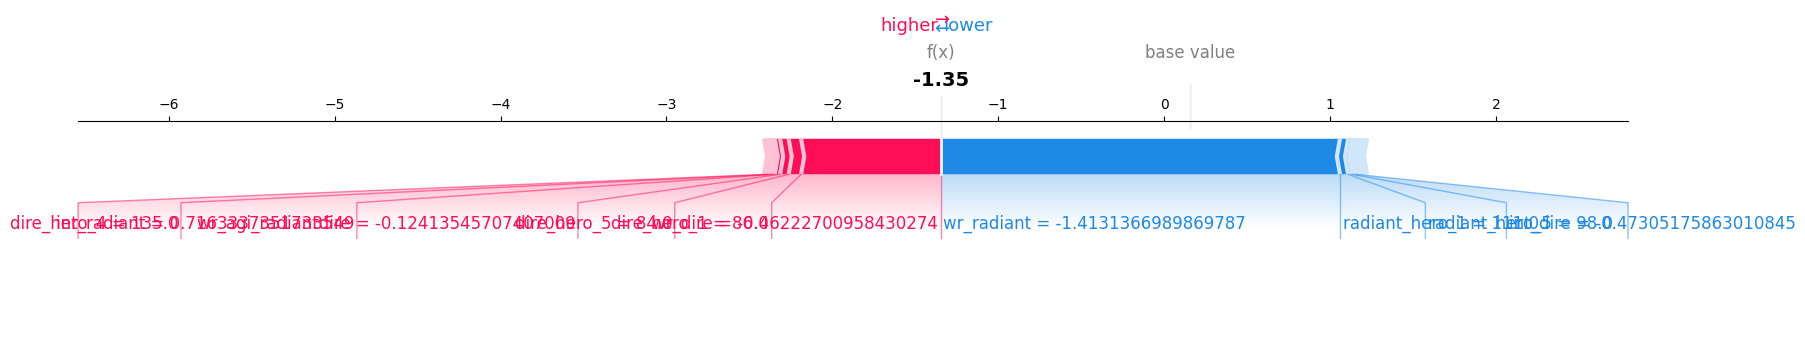

In [63]:
plt.figure(figsize=(10, 80))
shap.plots.force(shap_values[0], matplotlib=True)
plt.show()

In [44]:
#Построить график shap.plots.force для одного объекта выборки и для среза произвольного размера.
# не запускается, поэтому сохранил
shap.save_html("force_plot.html", shap.plots.force(shap_values[:100]))

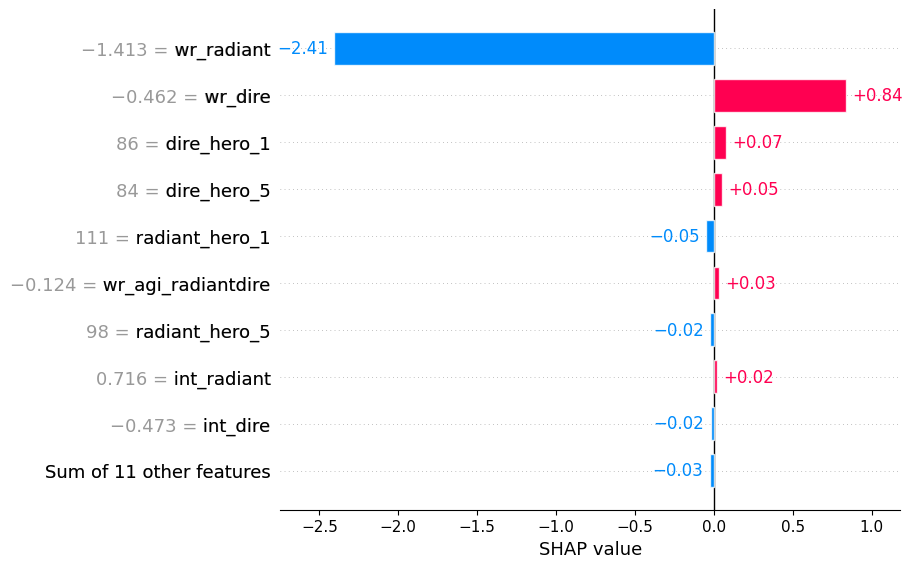

In [46]:
plt.figure()
shap.plots.bar(shap_values[0])
plt.show()

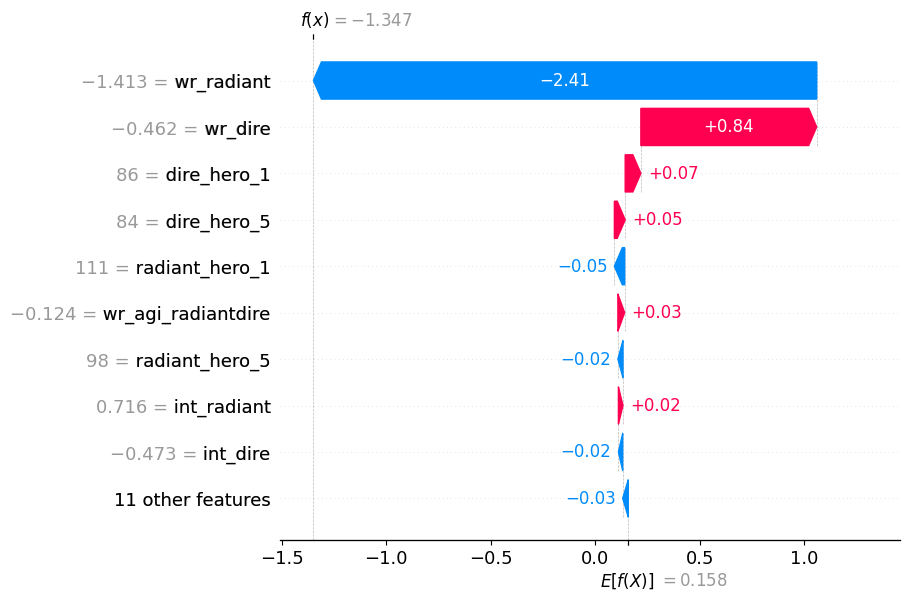

In [47]:
plt.figure()
shap.plots.waterfall(shap_values[0])
plt.show()


<Figure size 640x480 with 0 Axes>

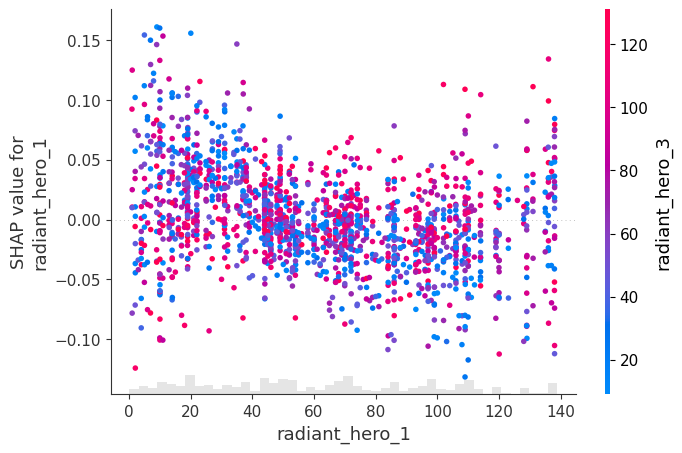

In [48]:
feature = X_test_raw.columns[0]
plt.figure()
shap.plots.scatter(shap_values[:, feature], color=shap_values)
plt.show()

<Figure size 640x480 with 0 Axes>

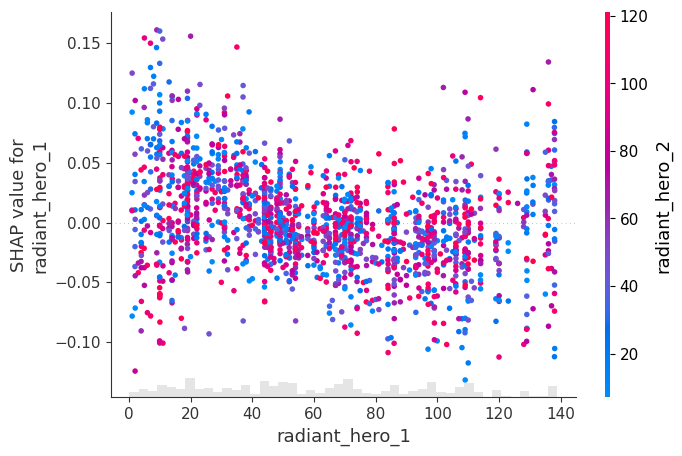

In [49]:
other_feature = X_test_raw.columns[1]
plt.figure()
shap.plots.scatter(shap_values[:, feature], color=shap_values[:, other_feature])
plt.show()

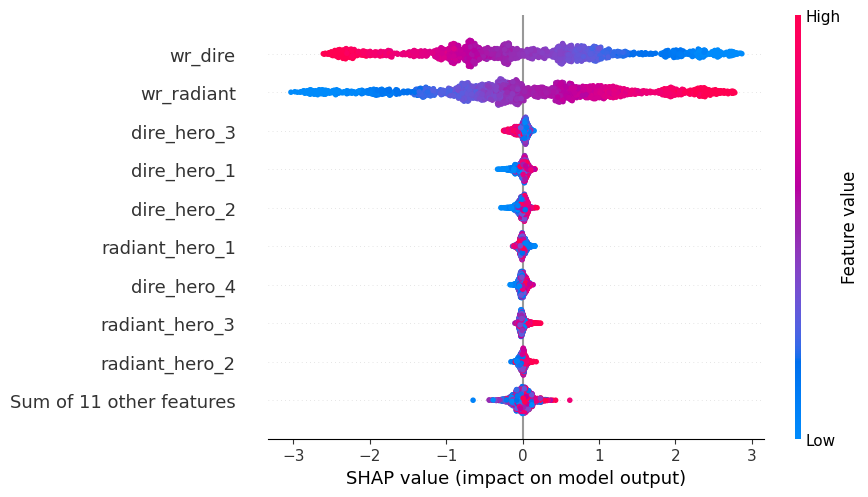

In [50]:
plt.figure()
shap.plots.beeswarm(shap_values)
plt.show()


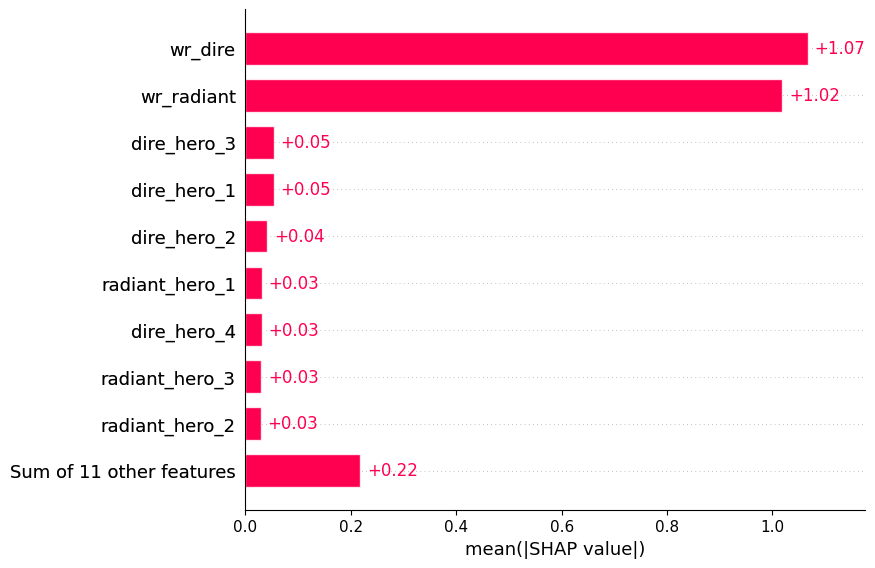

In [52]:
plt.figure()
shap.plots.bar(shap_values)
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_test_raw.columns,
    'importance': np.abs(shap_values.values).mean(axis=0)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\n10 лучших функций по важности SHAP:")
print(feature_importance.head(10))

# Select top 10 features
top_features = feature_importance['feature'][:10].tolist()
X_train_filtered = X_train_raw[top_features]
X_test_filtered = X_test_raw[top_features]


Top 10 features by SHAP importance:
           feature  importance
11         wr_dire    1.067039
10      wr_radiant    1.018287
7      dire_hero_3    0.053768
5      dire_hero_1    0.053588
6      dire_hero_2    0.041188
0   radiant_hero_1    0.031197
8      dire_hero_4    0.031021
2   radiant_hero_3    0.029925
1   radiant_hero_2    0.029439
9      dire_hero_5    0.027655


In [65]:
# Identify categorical features in the filtered set
cat_features = [f for f in top_features if f.startswith('radiant_hero') or f.startswith('dire_hero')]

# Retrain CatBoost on filtered features
catboost_filtered = CatBoostClassifier(
    **best_params['CatBoost'],
    random_state=42,
    verbose=0,
    train_dir='catboost_info'
)
catboost_filtered.fit(X_train_filtered, y_train_raw, cat_features=cat_features, early_stopping_rounds=10)

# Compare metrics
print("\nMetrics before filtering (CatBoost_Raw):")
y_pred = best_model.predict(X_test_raw)
print(classification_report(y_test_raw, y_pred))

print("\nMetrics after filtering:")
y_pred_filtered = catboost_filtered.predict(X_test_filtered)
print(classification_report(y_test_raw, y_pred_filtered))


Metrics before filtering (CatBoost_Raw):
              precision    recall  f1-score   support

       False       0.80      0.77      0.79       801
        True       0.80      0.82      0.81       869

    accuracy                           0.80      1670
   macro avg       0.80      0.80      0.80      1670
weighted avg       0.80      0.80      0.80      1670


Metrics after filtering:
              precision    recall  f1-score   support

       False       0.78      0.78      0.78       801
        True       0.80      0.80      0.80       869

    accuracy                           0.79      1670
   macro avg       0.79      0.79      0.79      1670
weighted avg       0.79      0.79      0.79      1670



In [66]:
print("\nFeature importance from CatBoost:")
catboost_importance = pd.DataFrame({
    'feature': top_features,
    'importance': catboost_filtered.get_feature_importance()
})
print(catboost_importance.sort_values('importance', ascending=False))


Feature importance from CatBoost:
          feature  importance
1      wr_radiant   19.882846
0         wr_dire   19.724308
6     dire_hero_4    8.781650
9     dire_hero_5    8.402089
2     dire_hero_3    7.905258
3     dire_hero_1    7.886729
5  radiant_hero_1    7.263051
8  radiant_hero_2    7.144010
7  radiant_hero_3    7.073697
4     dire_hero_2    5.936361


# Регрессия

In [76]:
y_train_reg = X_train_raw['wr_radiant'].copy()
y_test_reg = X_test_raw['wr_radiant'].copy()

# GridSearchCV для CatBoostRegressor
param_grid_reg = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3]
}

catboost_reg = CatBoostRegressor(random_state=42, verbose=0, train_dir='catboost_info')
grid_search_reg = GridSearchCV(
    estimator=catboost_reg,
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1
)
grid_search_reg.fit(X_train_encoded, y_train_reg, early_stopping_rounds=10, eval_set=(X_test_encoded, y_test_encoded), verbose=False)

# Обучение регрессора на полных данных
catboost_reg_best = grid_search_reg.best_estimator_
catboost_reg_best.fit(X_train_raw, y_train_reg, cat_features=[col for col in X_train_raw.columns if col.startswith('radiant_hero') or col.startswith('dire_hero')])

In [77]:
# Метрики регрессии
y_pred_reg = catboost_reg_best.predict(X_test_raw)
print("\nМетрики регрессии (полные признаки):")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"R2: {r2_score(y_test_reg, y_pred_reg):.4f}")

catboost_reg_filtered = CatBoostRegressor(**grid_search_reg.best_params_, random_state=42, verbose=0)
catboost_reg_filtered.fit(X_train_filtered, y_train_reg, cat_features=cat_features)
y_pred_reg_filtered = catboost_reg_filtered.predict(X_test_filtered)
print("\nМетрики регрессии (отфильтрованные признаки):")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg_filtered):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg_filtered):.4f}")
print(f"R2: {r2_score(y_test_reg, y_pred_reg_filtered):.4f}")


Метрики регрессии (полные признаки):
MSE: 0.1880
MAE: 0.2870
R2: 0.8091

Метрики регрессии (отфильтрованные признаки):
MSE: 0.1750
MAE: 0.2813
R2: 0.8223


После фильтрации можно увидеть, что метрики улучшились.